<ul><h3>Analyse de forme</h3>
    <li>variable target : Prix</li>
    <li>lignes et colonnes :(24776, 32)</li>
    <li>types de variables quantitative:21  , qualitative :11</li>
    <li> analyse des valeurs manquantes : le sercteur 50 % ,Etat  27%,Nombre de portes 17 %,Origine 21 % ,Première main 25 %,État 26 %</li>
</ul>
<br>
<ul><h3>Analyse de fond</h3>
    <li>visualisation de la target </li>
    <li>sigifications des variables</li>
    <li>relation variables /target </li>
    
</ul>

In [98]:
import pandas as pd
import sklearn 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [99]:
pd.set_option('display.max_row',50) # afficher le nombre max de lignes
pd.set_option('display.max_column',32)

In [100]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\S2\\ML\\avito_car_dataset_ALL.csv', encoding='latin-1')

In [101]:
df=data.copy()

In [102]:
df.shape

(24776, 32)

In [103]:
df.columns

Index(['Unnamed: 0', 'Lien', 'Ville', 'Secteur', 'Marque', 'Modèle',
       'Année-Modèle', 'Kilométrage', 'Type de carburant', 'Puissance fiscale',
       'Boite de vitesses', 'Nombre de portes', 'Origine', 'Première main',
       'État', 'Jantes aluminium', 'Airbags', 'Climatisation',
       'Système de navigation/GPS', 'Toit ouvrant', 'Sièges cuir',
       'Radar de recul', 'Caméra de recul', 'Vitres électriques', 'ABS', 'ESP',
       'Régulateur de vitesse', 'Limiteur de vitesse', 'CD/MP3/Bluetooth',
       'Ordinateur de bord', 'Verrouillage centralisé à distance', 'Prix'],
      dtype='object')

In [104]:
df.dtypes

Unnamed: 0                              int64
Lien                                   object
Ville                                  object
Secteur                                object
Marque                                 object
Modèle                                 object
Année-Modèle                            int64
Kilométrage                            object
Type de carburant                      object
Puissance fiscale                       int64
Boite de vitesses                      object
Nombre de portes                      float64
Origine                                object
Première main                          object
État                                   object
Jantes aluminium                         bool
Airbags                                  bool
Climatisation                            bool
Système de navigation/GPS                bool
Toit ouvrant                             bool
Sièges cuir                              bool
Radar de recul                    

In [105]:
df.dtypes.value_counts()

bool       16
object     11
int64       4
float64     1
Name: count, dtype: int64

<Axes: ylabel='count'>

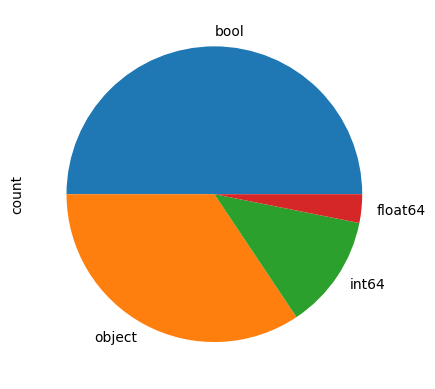

In [106]:
df.dtypes.value_counts().plot.pie()

In [107]:
df.describe()

,Unnamed: 0,Année-Modèle,Puissance fiscale,Nombre de portes,Prix
count,24776.000000,24776.000000,24776.000000,20396.000000,2.477600e+04
mean,12387.500000,2011.844244,7.193938,4.905766,2.169588e+05
std,7152.359471,5.462925,1.574124,0.423789,6.749569e+06
min,0.000000,1990.000000,5.000000,3.000000,6.000000e+04
25%,6193.750000,2008.000000,6.000000,5.000000,7.500000e+04
50%,12387.500000,2013.000000,7.000000,5.000000,1.000000e+05
75%,18581.250000,2016.000000,8.000000,5.000000,1.400000e+05
max,24775.000000,2022.000000,14.000000,5.000000,6.120372e+08


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


In [108]:
df.isna()

,Unnamed: 0,Lien,Ville,Secteur,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,Première main,État,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24772,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24773,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24774,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

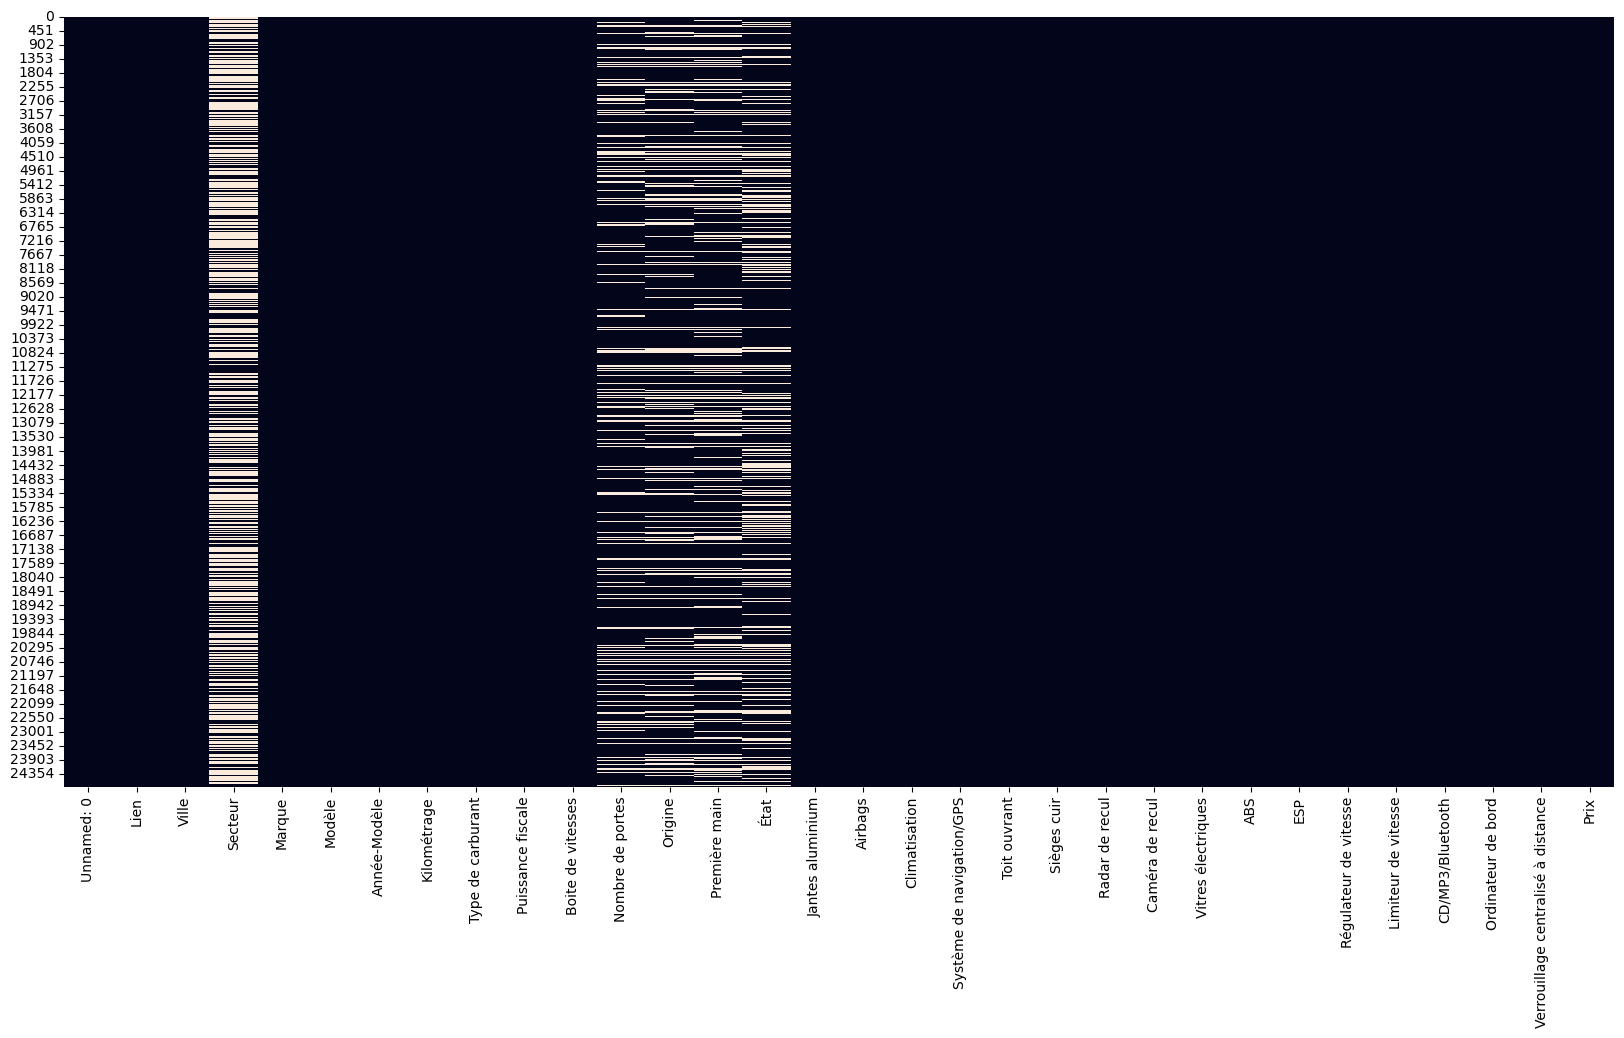

In [109]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [110]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)  #pourcentage des valeurs manquantes

Unnamed: 0                            0.000000
Ordinateur de bord                    0.000000
CD/MP3/Bluetooth                      0.000000
Limiteur de vitesse                   0.000000
Régulateur de vitesse                 0.000000
ESP                                   0.000000
ABS                                   0.000000
Vitres électriques                    0.000000
Caméra de recul                       0.000000
Radar de recul                        0.000000
Sièges cuir                           0.000000
Toit ouvrant                          0.000000
Système de navigation/GPS             0.000000
Climatisation                         0.000000
Airbags                               0.000000
Jantes aluminium                      0.000000
Boite de vitesses                     0.000000
Puissance fiscale                     0.000000
Type de carburant                     0.000000
Kilométrage                           0.000000
Année-Modèle                          0.000000
Modèle       

### Deal with missing data
<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row   <br>
        b. Drop the whole column :drop secteur lien unamed
    </li>
    <li>Replace data<br>
        a. Replace it by mean : Nombre de portes<br>
        b. Replace it by frequency : Origine, Première main, État<br>
        c. Replace it based on other functions
    </li>
</ol>


<h3>Eliminer les valeurs manquantes</h3>

In [111]:
# Supprimer la variable "Secteur" du DataFrame
df.drop(columns=['Secteur'], inplace=True)
df.drop(columns=['Lien'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

<h3>Remplacer les valeurs manquantes </h3>

In [112]:
# Remplacer les valeurs manquantes pour les variables numériques par la moyenne
mean_portes = df['Nombre de portes'].mean()
df['Nombre de portes'].fillna(mean_portes, inplace=True)

In [113]:
# Remplacer les valeurs manquantes pour les variables catégorielles par le mode
mode_origine = df['Origine'].mode()[0]
df['Origine'].fillna(mode_origine, inplace=True)

mode_premiere_main = df['Première main'].mode()[0]
df['Première main'].fillna(mode_premiere_main, inplace=True)

mode_etat = df['État'].mode()[0]
df['État'].fillna(mode_etat, inplace=True)

In [114]:
# Remplacer les valeurs '--' par NaN
df['Boite de vitesses'].replace('--', np.nan, inplace=True)

# Calculer le mode de la colonne "Boite de vitesses"
mode_boite_vitesses = df['Boite de vitesses'].mode()[0]

# Remplacer les valeurs NaN par le mode
df['Boite de vitesses'].fillna(mode_boite_vitesses, inplace=True)

In [115]:
df.head()

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,Première main,État,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,Temara,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,Manuelle,5.0,WW au Maroc,Non,Très bon,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,60000
1,Temara,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,Manuelle,3.0,WW au Maroc,Non,Excellent,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,70000
2,Casablanca,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,Manuelle,5.0,WW au Maroc,Non,Très bon,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,90000
3,Casablanca,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,Automatique,5.0,WW au Maroc,Oui,Excellent,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,90000
4,Dakhla,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,Manuelle,5.0,WW au Maroc,Non,Excellent,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,97000



#### Analyse de Fond :
- **Visualisation de la target** :
    
- **Signification des variables** :
   

- **Relation Variables / Target** :
  
    
    

In [116]:
df['Prix'].value_counts()

Prix
65000     877
60000     853
75000     747
70000     634
85000     611
         ... 
222000      3
545000      3
485000      3
459000      3
70500       3
Name: count, Length: 386, dtype: int64

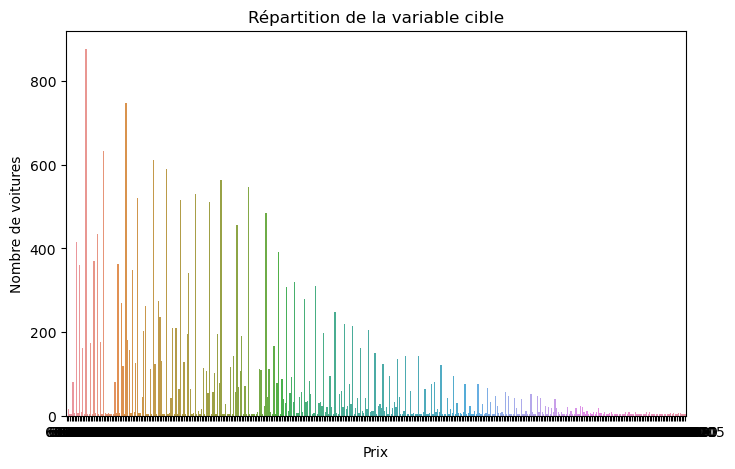

In [117]:
import matplotlib.pyplot as plt
target_counts = data['Prix'].value_counts()
# Visualiser les deux valeurs de la variable cible
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Répartition de la variable cible')
plt.xlabel('Prix')
plt.ylabel('Nombre de voitures')
plt.show()

 <br>la variable cible "Prix" a une large gamme de valeurs, montrant une distribution étalée et des concentrations de prix à certains niveaux. <br><br>

### histogrames des variables continues 

In [118]:
df.dtypes

Ville                                  object
Marque                                 object
Modèle                                 object
Année-Modèle                            int64
Kilométrage                            object
Type de carburant                      object
Puissance fiscale                       int64
Boite de vitesses                      object
Nombre de portes                      float64
Origine                                object
Première main                          object
État                                   object
Jantes aluminium                         bool
Airbags                                  bool
Climatisation                            bool
Système de navigation/GPS                bool
Toit ouvrant                             bool
Sièges cuir                              bool
Radar de recul                           bool
Caméra de recul                          bool
Vitres électriques                       bool
ABS                               

In [119]:
numeric_columns = ['Année-Modèle', 'Puissance fiscale', 'Nombre de portes']
target_variable = 'Prix'

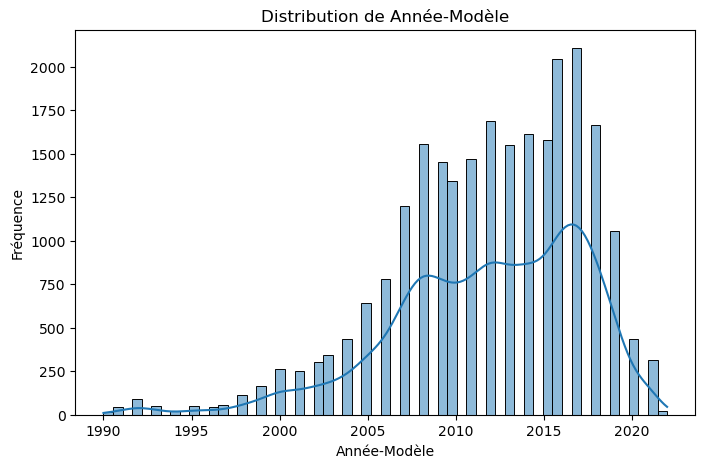

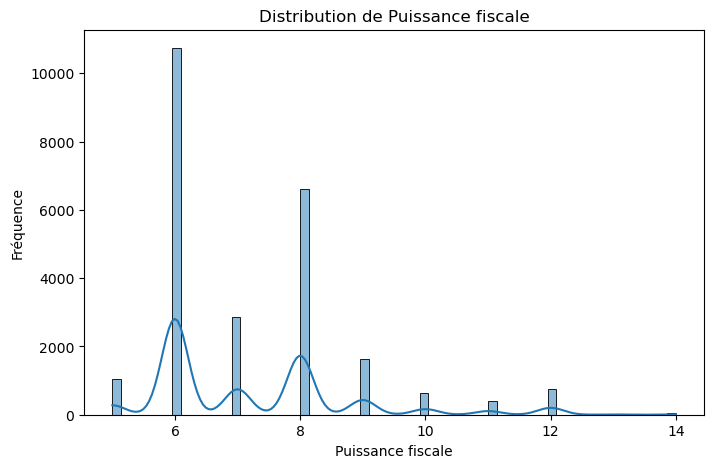

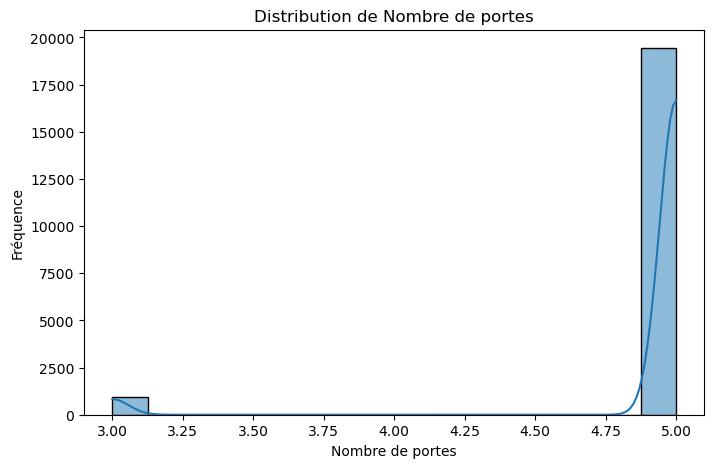

In [120]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

les voitures dont l'année de modèle entre 2006 et 2017 sont les plus dominants 
la puissance fiscale des voitures pour les valeurs 8 et 6 est plus présente dans la distribution et méme je vois que le nombre de porte 5 est plus majoritaire 

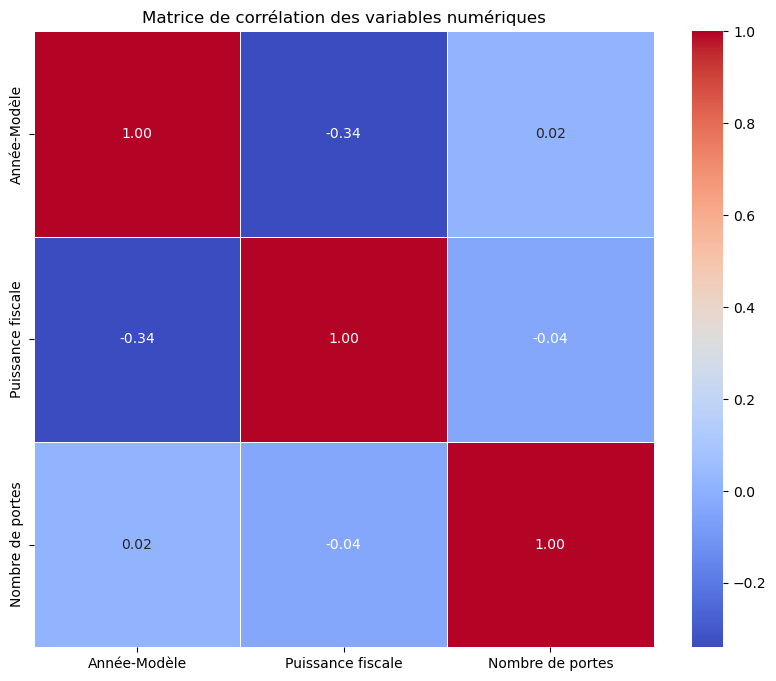

In [121]:
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')
plt.show()


In [122]:
# Calculer la corrélation entre les variables numériques et la variable cible
correlation_matrix = df[numeric_columns + ['Prix']].corr()

# Afficher la corrélation avec la variable cible
print("Corrélation avec la variable cible ('Prix') :")
print(correlation_matrix['Prix'].sort_values(ascending=False))


Corrélation avec la variable cible ('Prix') :
Prix                 1.000000
Année-Modèle         0.004347
Nombre de portes     0.002757
Puissance fiscale   -0.005784
Name: Prix, dtype: float64


la valeur de la corrélation est de 0 .Ce qui signifie qu'il n'ya pas de corrélation entre ces variables et la target

In [123]:
df.dtypes

Ville                                  object
Marque                                 object
Modèle                                 object
Année-Modèle                            int64
Kilométrage                            object
Type de carburant                      object
Puissance fiscale                       int64
Boite de vitesses                      object
Nombre de portes                      float64
Origine                                object
Première main                          object
État                                   object
Jantes aluminium                         bool
Airbags                                  bool
Climatisation                            bool
Système de navigation/GPS                bool
Toit ouvrant                             bool
Sièges cuir                              bool
Radar de recul                           bool
Caméra de recul                          bool
Vitres électriques                       bool
ABS                               

In [124]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


In [125]:
def pltCountplot(cats, data):
    # Calcul du nombre de lignes nécessaires en fonction du nombre de colonnes catégoriques
    num_rows = (len(cats) + 2) // 3
    
    # Ajustement de la taille de la figure en fonction du nombre de lignes
    fig, axis = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

    index = 0
    for i in range(num_rows):
        for j in range(3):
            if index < len(cats):
                ax = sns.countplot(x=cats[index], data=data, ax=axis[i][j])

                # Rotation des étiquettes pour les colonnes spécifiques
                if cats[index] in ['Ville', 'Marque', 'Modèle', 'Type de carburant', 'Boite de vitesses', 'Origine', 'Première main', 'État']:
                    for item in ax.get_xticklabels():
                        item.set_rotation(15)

                # Affichage du pourcentage au-dessus des barres
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(p.get_x() + p.get_width() / 2.,
                            height + 3,
                            '{:1.2f}%'.format(height / len(data) * 100),
                            ha="center")
            else:
                # Suppression des sous-plots inutilisés
                fig.delaxes(axis[i][j])
            index += 1

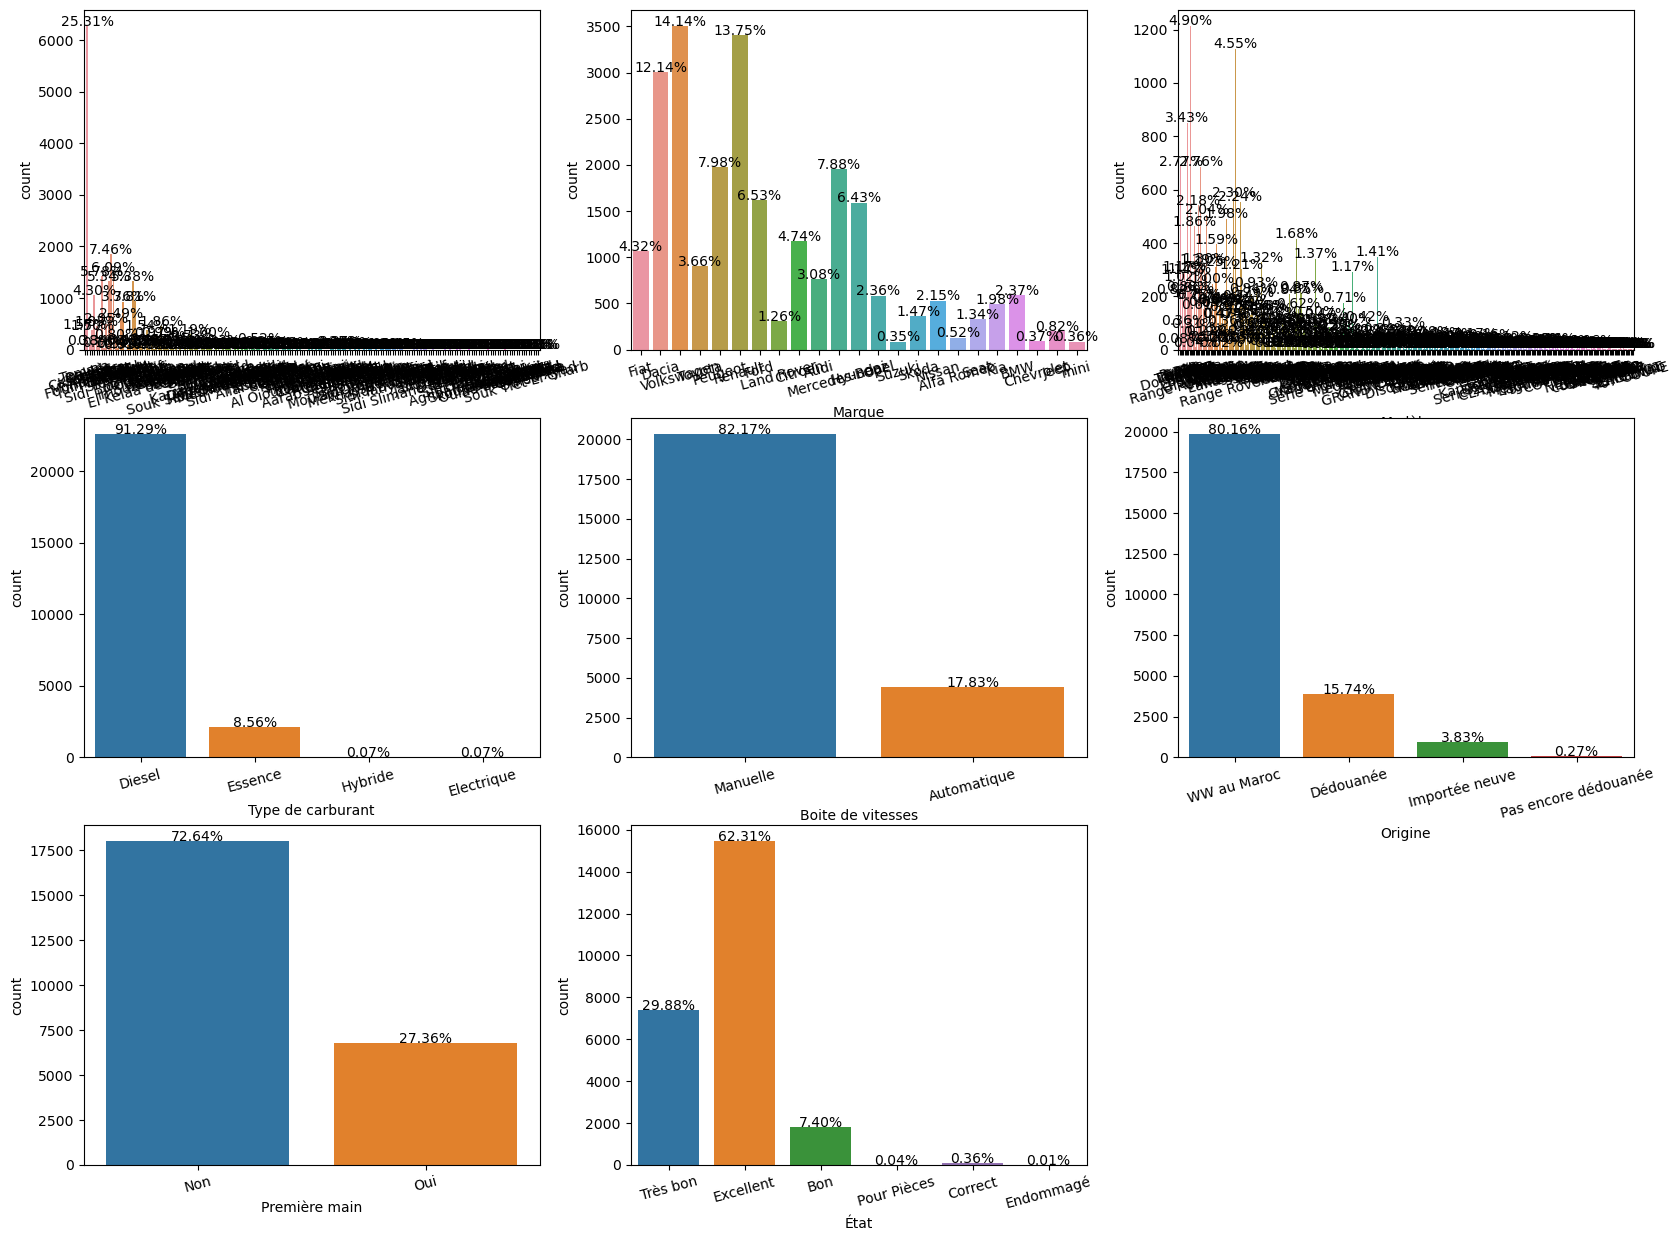

In [126]:
# Appel de la fonction avec la liste des variables catégoriques
categorical_columns = ['Ville', 'Marque', 'Modèle', 'Type de carburant', 'Boite de vitesses', 'Origine', 'Première main', 'État']
pltCountplot(categorical_columns, df)
plt.show()

je vois que la distribution de la marque et le modèle est trés variantes <br>
le diesel domine le type de carburant (91%)<br>
la boite de vitesse manuelle est majotitaire (82%)<br>
ww au maroc est aussi majoritaire (80%)<br>


In [127]:
from scipy.stats import f_oneway

for cat in categorical_columns:
    categories = df[cat].unique()
    print(f"ANOVA pour la variable catégorique '{cat}':")
    for category in categories:
        group = df[df[cat] == category]['Prix']
        f_statistic, p_value = f_oneway(group, df[df[cat] != category]['Prix'])
        print(f"Catégorie '{category}': F-statistique = {f_statistic:.2f}, p-value = {p_value:.4f}")
    print()


ANOVA pour la variable catégorique 'Ville':
Catégorie 'Temara': F-statistique = 0.10, p-value = 0.7549
Catégorie 'Casablanca': F-statistique = 0.60, p-value = 0.4398
Catégorie 'Dakhla': F-statistique = 0.03, p-value = 0.8564
Catégorie 'Khouribga': F-statistique = 0.08, p-value = 0.7833
Catégorie 'Meknès': F-statistique = 0.21, p-value = 0.6491
Catégorie 'Mohammedia': F-statistique = 0.09, p-value = 0.7677
Catégorie 'Fquih Ben Saleh': F-statistique = 0.01, p-value = 0.9105
Catégorie 'Fès': F-statistique = 0.22, p-value = 0.6417
Catégorie 'Ait Melloul': F-statistique = 0.01, p-value = 0.9096
Catégorie 'Tétouan': F-statistique = 0.06, p-value = 0.8015
Catégorie 'Tanger': F-statistique = 53.13, p-value = 0.0000
Catégorie 'Rabat': F-statistique = 0.26, p-value = 0.6120
Catégorie 'Marrakech': F-statistique = 0.21, p-value = 0.6430
Catégorie 'Taza': F-statistique = 0.05, p-value = 0.8180
Catégorie 'Taounate': F-statistique = 0.06, p-value = 0.8021
Catégorie 'El Jadida': F-statistique = 0.14, 

Catégorie 'Ratba': F-statistique = 0.00, p-value = 0.9526
Catégorie 'Tata': F-statistique = 0.00, p-value = 0.9664
Catégorie 'El Borouj': F-statistique = 0.00, p-value = 0.9683
Catégorie 'Demnate': F-statistique = 0.00, p-value = 0.9586
Catégorie 'Sidi Slimane Echcharraa': F-statistique = 0.00, p-value = 0.9604
Catégorie 'Martil': F-statistique = 0.00, p-value = 0.9651
Catégorie 'Fnideq': F-statistique = 0.00, p-value = 0.9689
Catégorie 'Sidi Hajjaj': F-statistique = 0.00, p-value = 0.9935
Catégorie 'Targuist': F-statistique = 0.00, p-value = 0.9480
Catégorie 'Imouzzer': F-statistique = 0.00, p-value = 0.9685
Catégorie 'Sidi Taibi': F-statistique = 0.00, p-value = 0.9724
Catégorie 'Jamaat Shaim': F-statistique = 0.00, p-value = 0.9687
Catégorie 'Sidi Lyamani': F-statistique = 0.02, p-value = 0.8912
Catégorie 'Ait Ourir': F-statistique = 0.00, p-value = 0.9503
Catégorie 'Saidia': F-statistique = 0.00, p-value = 0.9687
Catégorie 'Bejaad': F-statistique = 0.00, p-value = 0.9915
Catégorie 

Catégorie 'Corolla': F-statistique = 0.07, p-value = 0.7844
Catégorie 'Sorento': F-statistique = 0.03, p-value = 0.8611
Catégorie 'Serie 5': F-statistique = 0.00, p-value = 0.9469
Catégorie 'C-Max': F-statistique = 0.02, p-value = 0.8991
Catégorie 'Doblo': F-statistique = 0.13, p-value = 0.7166
Catégorie 'Ka': F-statistique = 0.02, p-value = 0.8974
Catégorie '508': F-statistique = 0.03, p-value = 0.8717
Catégorie 'Classe E': F-statistique = 0.01, p-value = 0.9402
Catégorie 'Symbol': F-statistique = 0.03, p-value = 0.8689
Catégorie 'X1': F-statistique = 0.00, p-value = 0.9636
Catégorie 'Classe A': F-statistique = 0.02, p-value = 0.8887
Catégorie 'Jetta': F-statistique = 0.01, p-value = 0.9048
Catégorie '500L': F-statistique = 0.00, p-value = 0.9591
Catégorie 'Yaris': F-statistique = 0.03, p-value = 0.8646
Catégorie 'Captiva': F-statistique = 0.01, p-value = 0.9303
Catégorie 'Carens': F-statistique = 0.05, p-value = 0.8208
Catégorie 'Mito': F-statistique = 0.00, p-value = 0.9664
Catégori

Catégorie 'C4 Aircross': F-statistique = 0.00, p-value = 0.9842
Catégorie 'Q8': F-statistique = 0.02, p-value = 0.8932
Catégorie 'Vitara': F-statistique = 2.34, p-value = 0.1264
Catégorie 'Koleos': F-statistique = 0.00, p-value = 0.9622
Catégorie 'Grand Scenic': F-statistique = 0.01, p-value = 0.9407
Catégorie 'TRANS SPORT': F-statistique = 0.00, p-value = 0.9750
Catégorie 'Jumper': F-statistique = 0.00, p-value = 0.9472
Catégorie '205': F-statistique = 0.00, p-value = 0.9679
Catégorie 'A5': F-statistique = 0.00, p-value = 0.9800
Catégorie 'CLASSE GLK': F-statistique = 0.00, p-value = 0.9991
Catégorie 'Mustang': F-statistique = 0.00, p-value = 0.9658
Catégorie 'Freelander': F-statistique = 0.01, p-value = 0.9322
Catégorie 'Serie 4': F-statistique = 0.00, p-value = 0.9585
Catégorie 'X3': F-statistique = 0.00, p-value = 0.9799
Catégorie 'CITAN': F-statistique = 0.00, p-value = 0.9774
Catégorie 'C4 CACTUS': F-statistique = 0.00, p-value = 0.9586
Catégorie 'Wrangler': F-statistique = 0.00,

Catégorie 'Classe GLC': F-statistique = 0.00, p-value = 0.9745
Catégorie 'Gt': F-statistique = 0.00, p-value = 0.9720
Catégorie 'ESCAPE': F-statistique = 0.00, p-value = 0.9853
Catégorie 'Serie 5 M2': F-statistique = 0.00, p-value = 0.9752
Catégorie '806': F-statistique = 0.00, p-value = 0.9716
Catégorie 'Atos Prime': F-statistique = 0.00, p-value = 0.9444
Catégorie '210': F-statistique = 0.00, p-value = 0.9588
Catégorie 'Carry': F-statistique = 0.00, p-value = 0.9604
Catégorie 'MB': F-statistique = 0.00, p-value = 0.9679
Catégorie 'Fuego': F-statistique = 0.00, p-value = 0.9740
Catégorie 'VANEO': F-statistique = 0.00, p-value = 0.9689
Catégorie 'Albea': F-statistique = 0.00, p-value = 0.9689
Catégorie 'COUGAR': F-statistique = 0.00, p-value = 0.9795
Catégorie 'X4': F-statistique = 0.00, p-value = 0.9789
Catégorie 'Exeo': F-statistique = 0.00, p-value = 0.9718
Catégorie 'EOS': F-statistique = 0.00, p-value = 0.9567
Catégorie 'A2': F-statistique = 0.00, p-value = 0.9716
Catégorie 'A8': 

<h2>Binning</h2>

Text(0.5, 1.0, 'Kilométrage bins')

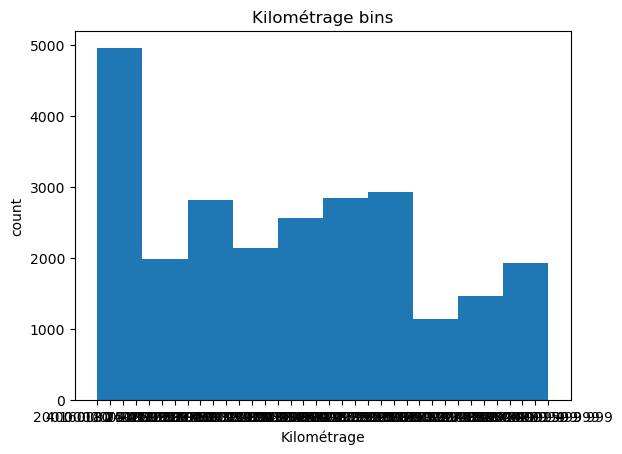

In [128]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Kilométrage"])

# set x/y labels and plot title
plt.pyplot.xlabel("Kilométrage")
plt.pyplot.ylabel("count")
plt.pyplot.title("Kilométrage bins")

In [129]:
# Diviser les plages en bornes inférieure et supérieure
df[['Kilométrage_min', 'Kilométrage_max']] = df['Kilométrage'].str.split(' - ', expand=True)

# Convertir les bornes en valeurs numériques
df['Kilométrage_min'] = pd.to_numeric(df['Kilométrage_min'].str.replace(' ', ''), errors='coerce')
df['Kilométrage_max'] = pd.to_numeric(df['Kilométrage_max'].str.replace(' ', ''), errors='coerce')

# Calcul de la largeur de bande optimale selon la règle de Scott
n = len(df)
bandwidth = 3.5 * np.std(df['Kilométrage_min']) / np.power(n, 1/3)

# Calcul du nombre de bins en divisant la plage des données par la largeur de bande
data_range = df['Kilométrage_max'].max() - df['Kilométrage_min'].min()
num_bins = int(data_range / bandwidth)
num_bins

50

In [130]:
# Calcul des limites des bins avec linspace
bins = np.linspace(df['Kilométrage_min'].min(), df['Kilométrage_max'].max(), 4 + 1)

# Binning de la variable Kilométrage
df['Kilométrage_binned'] = pd.cut(df['Kilométrage_min'], bins=bins, labels=False, include_lowest=True)
df.drop(columns=['Kilométrage'], inplace=True)

In [131]:
df.head()

,Ville,Marque,Modèle,Année-Modèle,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,Première main,État,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix,Kilométrage_min,Kilométrage_max,Kilométrage_binned
0,Temara,Fiat,Punto,2007,Diesel,5,Manuelle,5.0,WW au Maroc,Non,Très bon,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,60000,200000,249999,1
1,Temara,Dacia,Dokker Van,2013,Diesel,6,Manuelle,3.0,WW au Maroc,Non,Excellent,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,70000,400000,449999,3
2,Casablanca,Dacia,Dokker,2014,Diesel,6,Manuelle,5.0,WW au Maroc,Non,Très bon,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,90000,160000,169999,1
3,Casablanca,Volkswagen,Touareg,2005,Diesel,10,Automatique,5.0,WW au Maroc,Oui,Excellent,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,90000,0,4999,0
4,Dakhla,Toyota,Prado,2007,Diesel,12,Manuelle,5.0,WW au Maroc,Non,Excellent,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,97000,200000,249999,1


Text(0.5, 1.0, 'Puissance fiscale bins')

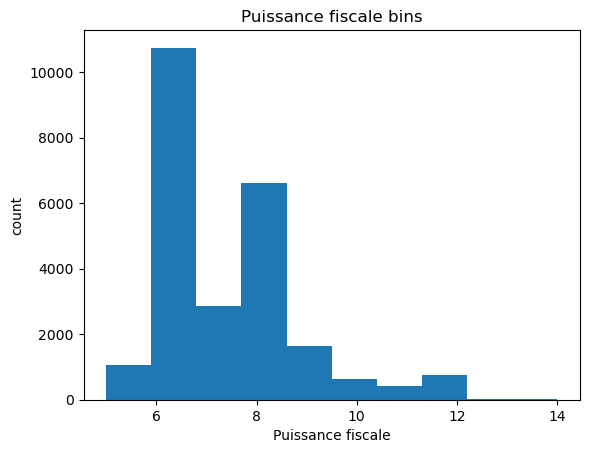

In [132]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Puissance fiscale"])

# set x/y labels and plot title
plt.pyplot.xlabel("Puissance fiscale")
plt.pyplot.ylabel("count")
plt.pyplot.title("Puissance fiscale bins")

In [133]:
# Détermination des limites des bins avec linspace
puissance_min = df['Puissance fiscale'].min()
puissance_max = df['Puissance fiscale'].max()
bins = np.linspace(puissance_min, puissance_max, 6 )

# Définition des étiquettes pour chaque bin
labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# Binning de la variable "Puissance fiscale"
df['Puissance_binned'] = pd.cut(df['Puissance fiscale'], bins=bins, labels=labels, include_lowest=True)
df.drop(columns=['Puissance fiscale'], inplace=True)

Text(0.5, 1.0, 'Année-Modèle bins')

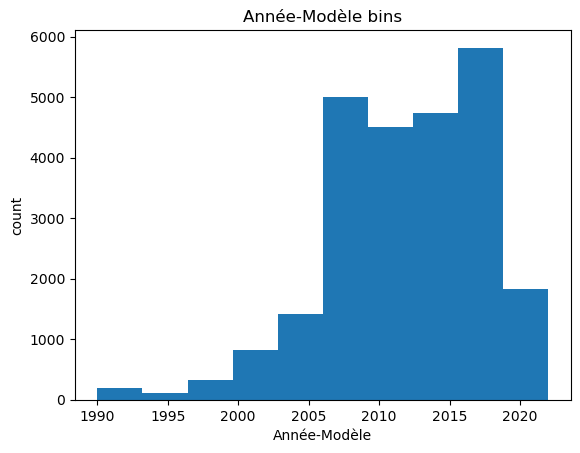

In [134]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Année-Modèle"])

# set x/y labels and plot title
plt.pyplot.xlabel("Année-Modèle")
plt.pyplot.ylabel("count")
plt.pyplot.title("Année-Modèle bins")


In [135]:
# Détermination des limites des bins avec linspace
annee_min = df['Année-Modèle'].min()
annee_max = df['Année-Modèle'].max()
bins = np.linspace(annee_min, annee_max, 4 + 1)

# Définition des étiquettes pour chaque bin
labels = ['Early', 'Mid-Early', 'Mid-Late', 'Late']

# Binning de la variable "Année-Modèle"
df['Année_binned'] = pd.cut(df['Année-Modèle'], bins=bins, labels=labels, include_lowest=True)
df.drop(columns=['Année-Modèle'], inplace=True)

## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>
one hot encoding si la variable a un nombre limité de valeurs unique 
label encoding si la variable a un sens d'ordre <br>

Ville
Marque
Modèle
Type de carburant
Boite de vitesses
Origine
Première main
État

In [136]:
df.dtypes

Ville                                   object
Marque                                  object
Modèle                                  object
Type de carburant                       object
Boite de vitesses                       object
Nombre de portes                       float64
Origine                                 object
Première main                           object
État                                    object
Jantes aluminium                          bool
Airbags                                   bool
Climatisation                             bool
Système de navigation/GPS                 bool
Toit ouvrant                              bool
Sièges cuir                               bool
Radar de recul                            bool
Caméra de recul                           bool
Vitres électriques                        bool
ABS                                       bool
ESP                                       bool
Régulateur de vitesse                     bool
Limiteur de v

In [137]:
df['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', 'Electrique'], dtype=object)

In [138]:
# Encodage one-hot de la variable "Type de carburant"

# Encodage one-hot de la variable "Type de carburant"
type_carburant_encoded = pd.get_dummies(df['Type de carburant'])

# Supprimer la colonne originale
df.drop(columns=['Type de carburant'], inplace=True)

# Ajouter les nouvelles colonnes encodées à votre DataFrame
df = pd.concat([df, type_carburant_encoded], axis=1)

In [139]:
df['État'].unique()

array(['Très bon', 'Excellent', 'Bon', 'Pour Pièces', 'Correct',
       'Endommagé'], dtype=object)

In [140]:
# Convertir la variable "État" en type catégorie pour pouvoir utiliser cat.codes
df['État'] = df['État'].astype('category')

# Appliquer l'encodage ordinal en utilisant cat.codes
df['État_encoded'] = df['État'].cat.codes

# Supprimer la colonne originale "État"
df.drop(columns=['État'], inplace=True)

In [141]:
df.head()

,Ville,Marque,Modèle,Boite de vitesses,Nombre de portes,Origine,Première main,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,...,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix,Kilométrage_min,Kilométrage_max,Kilométrage_binned,Puissance_binned,Année_binned,Diesel,Electrique,Essence,Hybride,État_encoded
0,Temara,Fiat,Punto,Manuelle,5.0,WW au Maroc,Non,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,60000,200000,249999,1,Low,Mid-Late,True,False,False,False,5
1,Temara,Dacia,Dokker Van,Manuelle,3.0,WW au Maroc,Non,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,70000,400000,449999,3,Low,Mid-Late,True,False,False,False,3
2,Casablanca,Dacia,Dokker,Manuelle,5.0,WW au Maroc,Non,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,90000,160000,169999,1,Low,Mid-Late,True,False,False,False,5
3,Casablanca,Volkswagen,Touareg,Automatique,5.0,WW au Maroc,Oui,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,90000,0,4999,0,Medium,Mid-Early,True,False,False,False,3
4,Dakhla,Toyota,Prado,Manuelle,5.0,WW au Maroc,Non,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,97000,200000,249999,1,Medium-High,Mid-Late,True,False,False,False,3


In [142]:
df['Première main'].unique()

array(['Non', 'Oui'], dtype=object)

*** l'encodage binaire car il n'y a que deux catégories possibles. L'encodage binaire remplace chaque catégorie par un entier binaire (0 ou 1), où 0 peut représenter "Non" et 1 peut représenter "Oui".***

In [143]:
# Mapping des catégories 'Non' et 'Oui' à 0 et 1
mapping = {'Non': 0, 'Oui': 1}

# Appliquer le mapping à la variable "Première main"
df['Première main_encoded'] = df['Première main'].map(mapping)

# Supprimer la colonne originale "Première main"
df.drop(columns=['Première main'], inplace=True)

In [144]:
df.head()

,Ville,Marque,Modèle,Boite de vitesses,Nombre de portes,Origine,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,...,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix,Kilométrage_min,Kilométrage_max,Kilométrage_binned,Puissance_binned,Année_binned,Diesel,Electrique,Essence,Hybride,État_encoded,Première main_encoded
0,Temara,Fiat,Punto,Manuelle,5.0,WW au Maroc,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,60000,200000,249999,1,Low,Mid-Late,True,False,False,False,5,0
1,Temara,Dacia,Dokker Van,Manuelle,3.0,WW au Maroc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,70000,400000,449999,3,Low,Mid-Late,True,False,False,False,3,0
2,Casablanca,Dacia,Dokker,Manuelle,5.0,WW au Maroc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,90000,160000,169999,1,Low,Mid-Late,True,False,False,False,5,0
3,Casablanca,Volkswagen,Touareg,Automatique,5.0,WW au Maroc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,90000,0,4999,0,Medium,Mid-Early,True,False,False,False,3,1
4,Dakhla,Toyota,Prado,Manuelle,5.0,WW au Maroc,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,97000,200000,249999,1,Medium-High,Mid-Late,True,False,False,False,3,0


In [145]:
df['Boite de vitesses'].unique()

array(['Manuelle', 'Automatique'], dtype=object)

In [146]:
# Mapping des catégories 'Manuelle' et 'Automatique' à 0 et 1
mapping = {'Manuelle': 0, 'Automatique': 1}

# Appliquer le mapping à la variable "Boite de vitesses"
df['Boite de vitesses_encoded'] = df['Boite de vitesses'].map(mapping)

# Supprimer la colonne originale "Boite de vitesses"
df.drop(columns=['Boite de vitesses'], inplace=True)

In [147]:
df.head()

,Ville,Marque,Modèle,Nombre de portes,Origine,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,...,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix,Kilométrage_min,Kilométrage_max,Kilométrage_binned,Puissance_binned,Année_binned,Diesel,Electrique,Essence,Hybride,État_encoded,Première main_encoded,Boite de vitesses_encoded
0,Temara,Fiat,Punto,5.0,WW au Maroc,False,False,True,False,False,False,False,False,False,True,False,...,True,False,False,60000,200000,249999,1,Low,Mid-Late,True,False,False,False,5,0,0
1,Temara,Dacia,Dokker Van,3.0,WW au Maroc,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,70000,400000,449999,3,Low,Mid-Late,True,False,False,False,3,0,0
2,Casablanca,Dacia,Dokker,5.0,WW au Maroc,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,90000,160000,169999,1,Low,Mid-Late,True,False,False,False,5,0,0
3,Casablanca,Volkswagen,Touareg,5.0,WW au Maroc,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,90000,0,4999,0,Medium,Mid-Early,True,False,False,False,3,1,1
4,Dakhla,Toyota,Prado,5.0,WW au Maroc,False,True,False,False,False,False,False,False,False,True,False,...,True,False,False,97000,200000,249999,1,Medium-High,Mid-Late,True,False,False,False,3,0,0


In [148]:
df['Origine'].unique()

array(['WW au Maroc', 'Dédouanée', 'Importée neuve',
       'Pas encore dédouanée'], dtype=object)

In [149]:
# Encodage one-hot de la variable "Origine" dans le DataFrame d'origine
df = pd.get_dummies(df, columns=['Origine'], prefix='Origine')

# Supprimer la colonne originale "Origine"
#df.drop(columns=['Origine'], inplace=True)

KeyError: "['Origine'] not found in axis"

In [150]:
df.head()

,Ville,Marque,Modèle,Nombre de portes,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,...,Kilométrage_min,Kilométrage_max,Kilométrage_binned,Puissance_binned,Année_binned,Diesel,Electrique,Essence,Hybride,État_encoded,Première main_encoded,Boite de vitesses_encoded,Origine_Dédouanée,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc
0,Temara,Fiat,Punto,5.0,False,False,True,False,False,False,False,False,False,True,False,False,...,200000,249999,1,Low,Mid-Late,True,False,False,False,5,0,0,False,False,False,True
1,Temara,Dacia,Dokker Van,3.0,False,False,False,False,False,False,False,False,False,False,False,False,...,400000,449999,3,Low,Mid-Late,True,False,False,False,3,0,0,False,False,False,True
2,Casablanca,Dacia,Dokker,5.0,False,False,False,False,False,False,False,False,False,False,False,False,...,160000,169999,1,Low,Mid-Late,True,False,False,False,5,0,0,False,False,False,True
3,Casablanca,Volkswagen,Touareg,5.0,False,False,False,False,False,False,False,False,False,False,False,False,...,0,4999,0,Medium,Mid-Early,True,False,False,False,3,1,1,False,False,False,True
4,Dakhla,Toyota,Prado,5.0,False,True,False,False,False,False,False,False,False,True,False,False,...,200000,249999,1,Medium-High,Mid-Late,True,False,False,False,3,0,0,False,False,False,True


In [151]:
df['Modèle'].nunique()

369

In [152]:
from scipy.stats import chi2_contingency

# Supposez que 'df' est votre DataFrame contenant les variables catégorielles et la variable cible

# Calcul de la table de contingence entre la variable catégorielle et la variable cible
contingency_table = pd.crosstab(df['Modèle'], df['Prix'])

# Calcul de la corrélation à l'aide du test du chi carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage de la corrélation
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 638447.0261634662
p-value: 0.0


<br>il y a une corrélation significative entre la variable "Modèle" et la variable cible. La taille de la statistique du test du chi carré (638447.0261634662) indique également une forte association entre les deux variables.<br/><br/><br/>

Text(0.5, 1.0, 'Modèle bins')

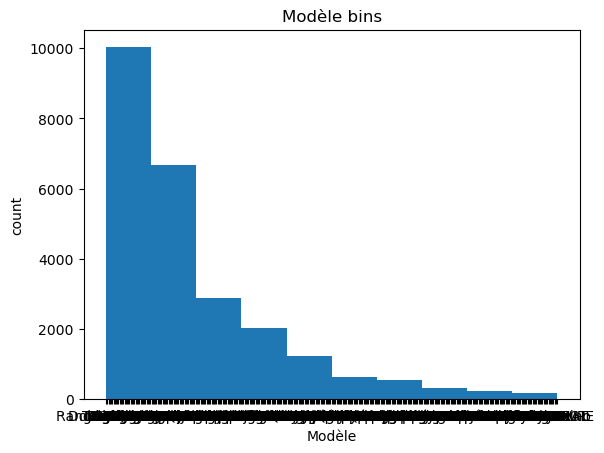

In [153]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Modèle"])

# set x/y labels and plot title
plt.pyplot.xlabel("Modèle")
plt.pyplot.ylabel("count")
plt.pyplot.title("Modèle bins")

In [154]:
from sklearn.preprocessing import LabelEncoder

# Convertir les valeurs de la colonne "Modèle" en catégories numériques
label_encoder = LabelEncoder()
df['Modèle_encoded'] = label_encoder.fit_transform(df['Modèle'])
df.drop(columns=['Modèle'], inplace=True)

In [155]:
df.head()

,Ville,Marque,Nombre de portes,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,...,Kilométrage_max,Kilométrage_binned,Puissance_binned,Année_binned,Diesel,Electrique,Essence,Hybride,État_encoded,Première main_encoded,Boite de vitesses_encoded,Origine_Dédouanée,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc,Modèle_encoded
0,Temara,Fiat,5.0,False,False,True,False,False,False,False,False,False,True,False,False,False,...,249999,1,Low,Mid-Late,True,False,False,False,5,0,0,False,False,False,True,272
1,Temara,Dacia,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,...,449999,3,Low,Mid-Late,True,False,False,False,3,0,0,False,False,False,True,159
2,Casablanca,Dacia,5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,...,169999,1,Low,Mid-Late,True,False,False,False,5,0,0,False,False,False,True,158
3,Casablanca,Volkswagen,5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,...,4999,0,Medium,Mid-Early,True,False,False,False,3,1,1,False,False,False,True,331
4,Dakhla,Toyota,5.0,False,True,False,False,False,False,False,False,False,True,False,False,False,...,249999,1,Medium-High,Mid-Late,True,False,False,False,3,0,0,False,False,False,True,270


In [156]:
df['Marque'].unique()

array(['Fiat', 'Dacia', 'Volkswagen', 'Toyota', 'Peugeot', 'Renault',
       'Ford', 'Land Rover', 'Citroen', 'Audi', 'Mercedes-Benz',
       'Hyundai', 'Opel', 'Suzuki', 'Skoda', 'Nissan', 'Alfa Romeo',
       'Seat', 'Kia', 'BMW', 'Chevrolet', 'Jeep', 'mini'], dtype=object)

In [157]:
df['Marque'].nunique()

23

In [158]:
from scipy.stats import chi2_contingency

# Supposez que 'df' est votre DataFrame contenant les variables catégorielles et la variable cible

# Calcul de la table de contingence entre la variable catégorielle et la variable cible
contingency_table = pd.crosstab(df['Marque'], df['Prix'])

# Calcul de la corrélation à l'aide du test du chi carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage de la corrélation
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 36029.8611203392
p-value: 0.0


<br>il existe une corrélation significative entre la variable "Marque" et la variable cible .<br><br><br>

In [159]:
from sklearn.preprocessing import LabelEncoder

# Convertir les valeurs de la colonne "Modèle" en catégories numériques
label_encoder = LabelEncoder()
df['Marque_encoded'] = label_encoder.fit_transform(df['Marque'])
df.drop(columns=['Marque'], inplace=True)

In [160]:
df['Ville'].nunique()

191

In [161]:
from scipy.stats import chi2_contingency

# Supposez que 'df' est votre DataFrame contenant les variables catégorielles et la variable cible

# Calcul de la table de contingence entre la variable catégorielle et la variable cible
contingency_table = pd.crosstab(df['Ville'], df['Prix'])

# Calcul de la corrélation à l'aide du test du chi carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage de la corrélation
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 255311.98232567354
p-value: 0.0


In [162]:

df.drop(columns=['Ville'], inplace=True)

In [163]:
df.dtypes

Nombre de portes                       float64
Jantes aluminium                          bool
Airbags                                   bool
Climatisation                             bool
Système de navigation/GPS                 bool
Toit ouvrant                              bool
Sièges cuir                               bool
Radar de recul                            bool
Caméra de recul                           bool
Vitres électriques                        bool
ABS                                       bool
ESP                                       bool
Régulateur de vitesse                     bool
Limiteur de vitesse                       bool
CD/MP3/Bluetooth                          bool
Ordinateur de bord                        bool
Verrouillage centralisé à distance        bool
Prix                                     int64
Kilométrage_min                          int64
Kilométrage_max                          int64
Kilométrage_binned                       int64
Puissance_bin

In [164]:
from sklearn.preprocessing import OrdinalEncoder
# Créer une instance de l'encodeur ordinal
ordinal_encoder = OrdinalEncoder()

# Appliquer l'encodeur ordinal aux colonnes binées
df['Puissance_binned'] = ordinal_encoder.fit_transform(df[['Puissance_binned']])
df['Année_binned'] = ordinal_encoder.fit_transform(df[['Année_binned']])

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Séparation des fonctionnalités et de la variable cible
X = df.drop(columns=['Prix'])
y = df['Prix']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coefficient de détermination (R²) :", r2)
print("Erreur quadratique moyenne (MSE) :", mse)
print("Erreur absolue moyenne (MAE) :", mae)


Coefficient de détermination (R²) : -0.5727014060774149
Erreur quadratique moyenne (MSE) : 798621184856.2815
Erreur absolue moyenne (MAE) : 458816.5654500431
